This is a code set for [100-Days-Of-ML-Code](https://github.com/Avik-Jain/100-Days-Of-ML-Code) project by Lyndon

# Part one
## Day 1 Data PreProcessing

- Import libraries 引入必要的库
- Import dataset 导入数据
- Process missing data 处理缺失值
- Encode data 格式编译
- Split into Train & Test 切分训练集和测试集
- Scale feature 特征标准化

### Import libraries

we will using numpy pandas & sklearn when studying.

In [1]:
import numpy as np  
import pandas as pd  #简写为np和pd是默认用法

### Import dataset

data from [100-Days-Of-ML-Code/datasets](https://github.com/Avik-Jain/100-Days-Of-ML-Code/tree/master/datasets)

in local：*./dataset/Data.csv*

用pandas去读，也可以用csv库读再转DataFrame

In [3]:
df = pd.read_csv('./dataset/Data.csv')

In [4]:
df.head()  # show the data

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [5]:
#从上面可以看到数据的大致特点，前面是特征，最后一行是预测值，数学中的Y
df.info()  #看个列的情况，df占用的内存，缺失值情况

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
Country      10 non-null object
Age          9 non-null float64
Salary       9 non-null float64
Purchased    10 non-null object
dtypes: float64(2), object(2)
memory usage: 400.0+ bytes


In [6]:
X = df.iloc[ : , :-1].values
Y = df.iloc[ : , 3].values

### Process missing data
处理缺失值也可以直接用pandas。

> df.fillna(value,method,axis,inplace,limit,downcast,\*\*kwargs)

In [7]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = "NaN", strategy = "mean", axis = 0)
imputer = imputer.fit(X[ : , 1:3])
X[ : , 1:3] = imputer.transform(X[ : , 1:3])

### Encoding categorical data

将分类数据编码为数值型，这里的要求就是将YES/NO Country转换为数字

In [8]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[ : , 0] = labelencoder_X.fit_transform(X[ : , 0])

In [9]:
X

array([[0, 44.0, 72000.0],
       [2, 27.0, 48000.0],
       [1, 30.0, 54000.0],
       [2, 38.0, 61000.0],
       [1, 40.0, 63777.77777777778],
       [0, 35.0, 58000.0],
       [2, 38.77777777777778, 52000.0],
       [0, 48.0, 79000.0],
       [1, 50.0, 83000.0],
       [0, 37.0, 67000.0]], dtype=object)

In [10]:
onehotencoder = OneHotEncoder(categorical_features = [0])
X = onehotencoder.fit_transform(X).toarray()
labelencoder_Y = LabelEncoder()
Y =  labelencoder_Y.fit_transform(Y)

### Split the datasets into Train & Test
这是跑模型几乎必然用到的，应该熟练应用（也就两行代码）

In [11]:
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X , Y , test_size = 0.2, random_state = 0)

E:\LcfSoftware\Anaconda201704\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Feature scaling
特征标准化，Z值归一化

In [12]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

## Day 2 Simple Linear Regression

简单线性回归
> Y = kX + b

- Preprocessing Data 用昨天的方法读取切分预处理
- Fitting LR Model 模型拟合
- Predecting the Result 预测Y值
- Visualization 画图可视化
### Preprocessing Data

读入数据->大致看一下数据->切分数据

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('../dataset/studentscores.csv')

In [2]:
df.head(3)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27


In [3]:
X = df.iloc[ : ,   : 1 ].values
Y = df.iloc[ : , 1 ].values

from sklearn.model_selection import train_test_split  ##把cross_validation改为model_selection就没有那个警告了
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 1/4, random_state = 0) 
#see at https://github.com/rhiever/tpot/issues/284 

### Fitting LR Model
调用sklearn的线性回归模型**LinearRegression**

In [4]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor = regressor.fit(X_train, Y_train)

### Predecting the Result

In [5]:
Y_pred = regressor.predict(X_test)
Y_pred

array([ 16.84472176,  33.74557494,  75.50062397,  26.7864001 ,
        60.58810646,  39.71058194,  20.8213931 ])

### Visualization
用matplotlib画图

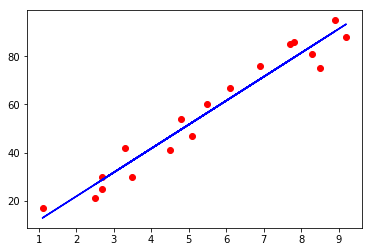

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X_train , Y_train, color = 'red')
plt.plot(X_train , regressor.predict(X_train), color ='blue')

## Day 3 Multiple Linear Regression
多元线性回归
> y=a1\*x1+a2\*x2+...+b

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('../dataset/50_Startups.csv')
X = df.iloc[ : , :-1].values
Y = df.iloc[ : ,  -1].values

df.head(3)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39


In [3]:
#数据源换了，套路不变
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()  #分类变量数值化
X[: , 3] = labelencoder.fit_transform(X[ : , 3])
onehotencoder = OneHotEncoder(categorical_features = [3])
X = onehotencoder.fit_transform(X).toarray()
X = X[: , 1:]

In [5]:
#切分为训练集和测试集
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [6]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
y_pred = regressor.predict(X_test)
y_pred

array([ 103015.20159795,  132582.27760817,  132447.73845176,
         71976.09851257,  178537.48221058,  116161.24230165,
         67851.69209675,   98791.73374686,  113969.43533013,
        167921.06569553])